# Exploratory Data Analysis (EDA)
## Early Stage Diabetes Risk Prediction Dataset

###  Objective
In this notebook, we will explore the dataset to understand the distribution of features, identify missing values, and analyze the relationship between symptoms (like Polyuria, Age) and the target variable (Diabetes Class).

###  Dataset Overview
* **Source:** UCI Machine Learning Repository (Sylhet Diabetes Hospital).
* **Rows:** 520
* **Columns:** 17 (1 Numerical, 15 Categorical, 1 Target).
* **Target:** `class` (Positive/Negative).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data
# Ensure the file 'diabetes_data_upload.csv' is in your data folder
df = pd.read_csv('../data/raw/diabetes_data_upload.csv')

# Display basic info
display(df.head())
print(f"Shape of data: {df.shape}")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


Shape of data: (520, 17)


### 1. Data Integrity & Structure

In [3]:
# Check data types and missing values
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum().sum(), "total missing values detected.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### Interpretation
* **Missing Values:** None. The dataset is clean (0 nulls in all columns).
* **Data Types:** Correctly identified. `Age` is integer, and all other features are `object` (strings like "Yes"/"No").
* **Decision:** No imputation (filling missing values) is required. We can proceed directly to Encoding and Scaling.

## 2. Target Distribution (Univariate Analysis)
Is the dataset balanced? Let's visualize the ratio of Positive vs. Negative cases.

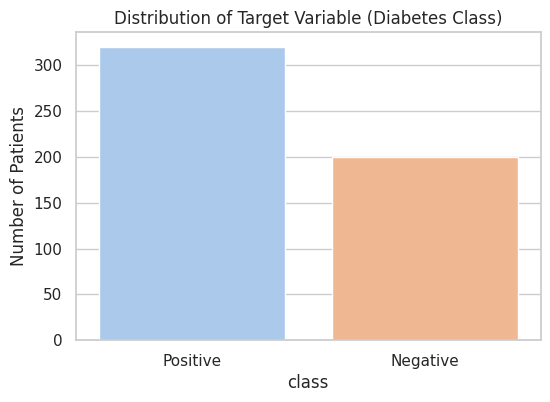

Positive Cases: 61.54%
Negative Cases: 38.46%


In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='pastel', hue='class', legend=False)
plt.title('Distribution of Target Variable (Diabetes Class)')
plt.ylabel('Number of Patients')
plt.show()

# Calculate exact percentage
freq = df['class'].value_counts(normalize=True) * 100
print(f"Positive Cases: {freq['Positive']:.2f}%")
print(f"Negative Cases: {freq['Negative']:.2f}%")

### Interpretation
#### Class Balance (Target Variable)
* **Observation:**
    * Positive (Diabetic): **61.54%** (320 patients)
    * Negative (Healthy): **38.46%** (200 patients)
* **Interpretation:** The dataset is slightly "imbalanced". There are *more* sick patients than healthy ones. This is common in hospital datasets (people usually go to the hospital when they are sick).
* **Decision:** The imbalance is not severe (approx 60/40). We **do not** need to apply SMOTE or aggressive resampling techniques. The model will learn fine on this distribution.

## 3. Numerical Analysis: Age
`Age` is our only numerical feature. Let's look at its distribution and check for outliers.

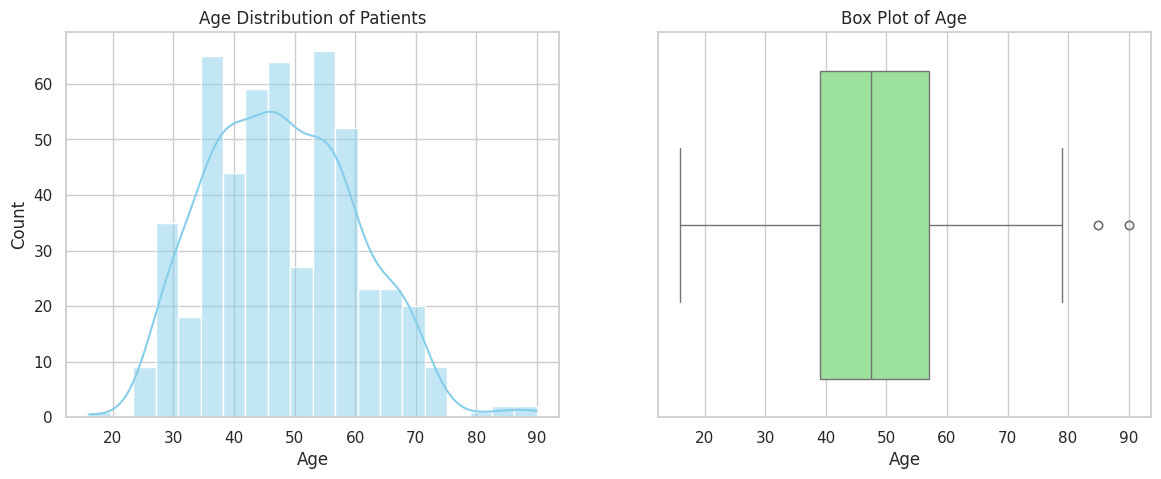

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Histogram (Distribution)
sns.histplot(df['Age'], kde=True, ax=axes[0], color='skyblue', bins=20)
axes[0].set_title('Age Distribution of Patients')

# Plot 2: Box Plot (Outlier Detection)
sns.boxplot(x=df['Age'], ax=axes[1], color='lightgreen')
axes[1].set_title('Box Plot of Age')

plt.show()

### Interpretation
* **Observation:** The Box Plot shows significant overlap between the Age ranges of Diabetic vs. Healthy patients.
* **Correlation:** Low (0.11).
* **Interpretation:** Age alone is **not** a strong predictor in this dataset. Young people in this group also have diabetes.
* **Decision:** We must still keep it, but we **must apply Scaling** (StandardScaler) so that Age (values like 20-90) doesn't overpower the binary features (0-1).

## 4. Bivariate Analysis: Age vs. Diabetes
Do older people tend to have a higher risk of Diabetes in this dataset?

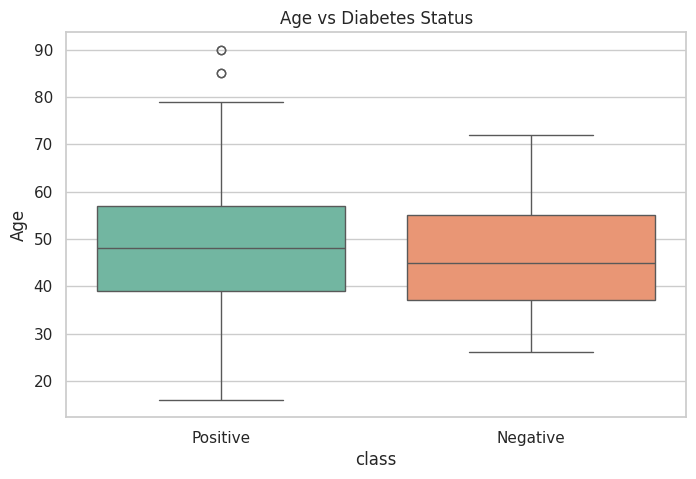

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='Age', data=df, palette='Set2', hue='class', legend=False)
plt.title('Age vs Diabetes Status')
plt.show()

### Interpretation: Age vs. Diabetes
* **Observation:** The box plots for Positive and Negative cases are nearly identical in position and spread.
* **Insight:** Unlike many other diabetes datasets where age is a dominant factor, in this "Early Stage" dataset, age is **not a strong separator**. Young people are just as likely to be positive as older people in this specific case.
* **Decision:**
    * **Keep the Feature:** We will not drop `Age` because it may still provide value when combined with other symptoms (interaction effects).
    * **Scaling Required:** Since the range is vastly different from the 0/1 categorical features, we **must apply StandardScaler** to prevent it from dominating the distance calculations in models like KNN or SVM.

## 5. Categorical Analysis: Symptoms vs. Diabetes
Since most features are "Yes/No", we will use **Count Plots** to see how often each symptom occurs in diabetic vs. healthy patients.

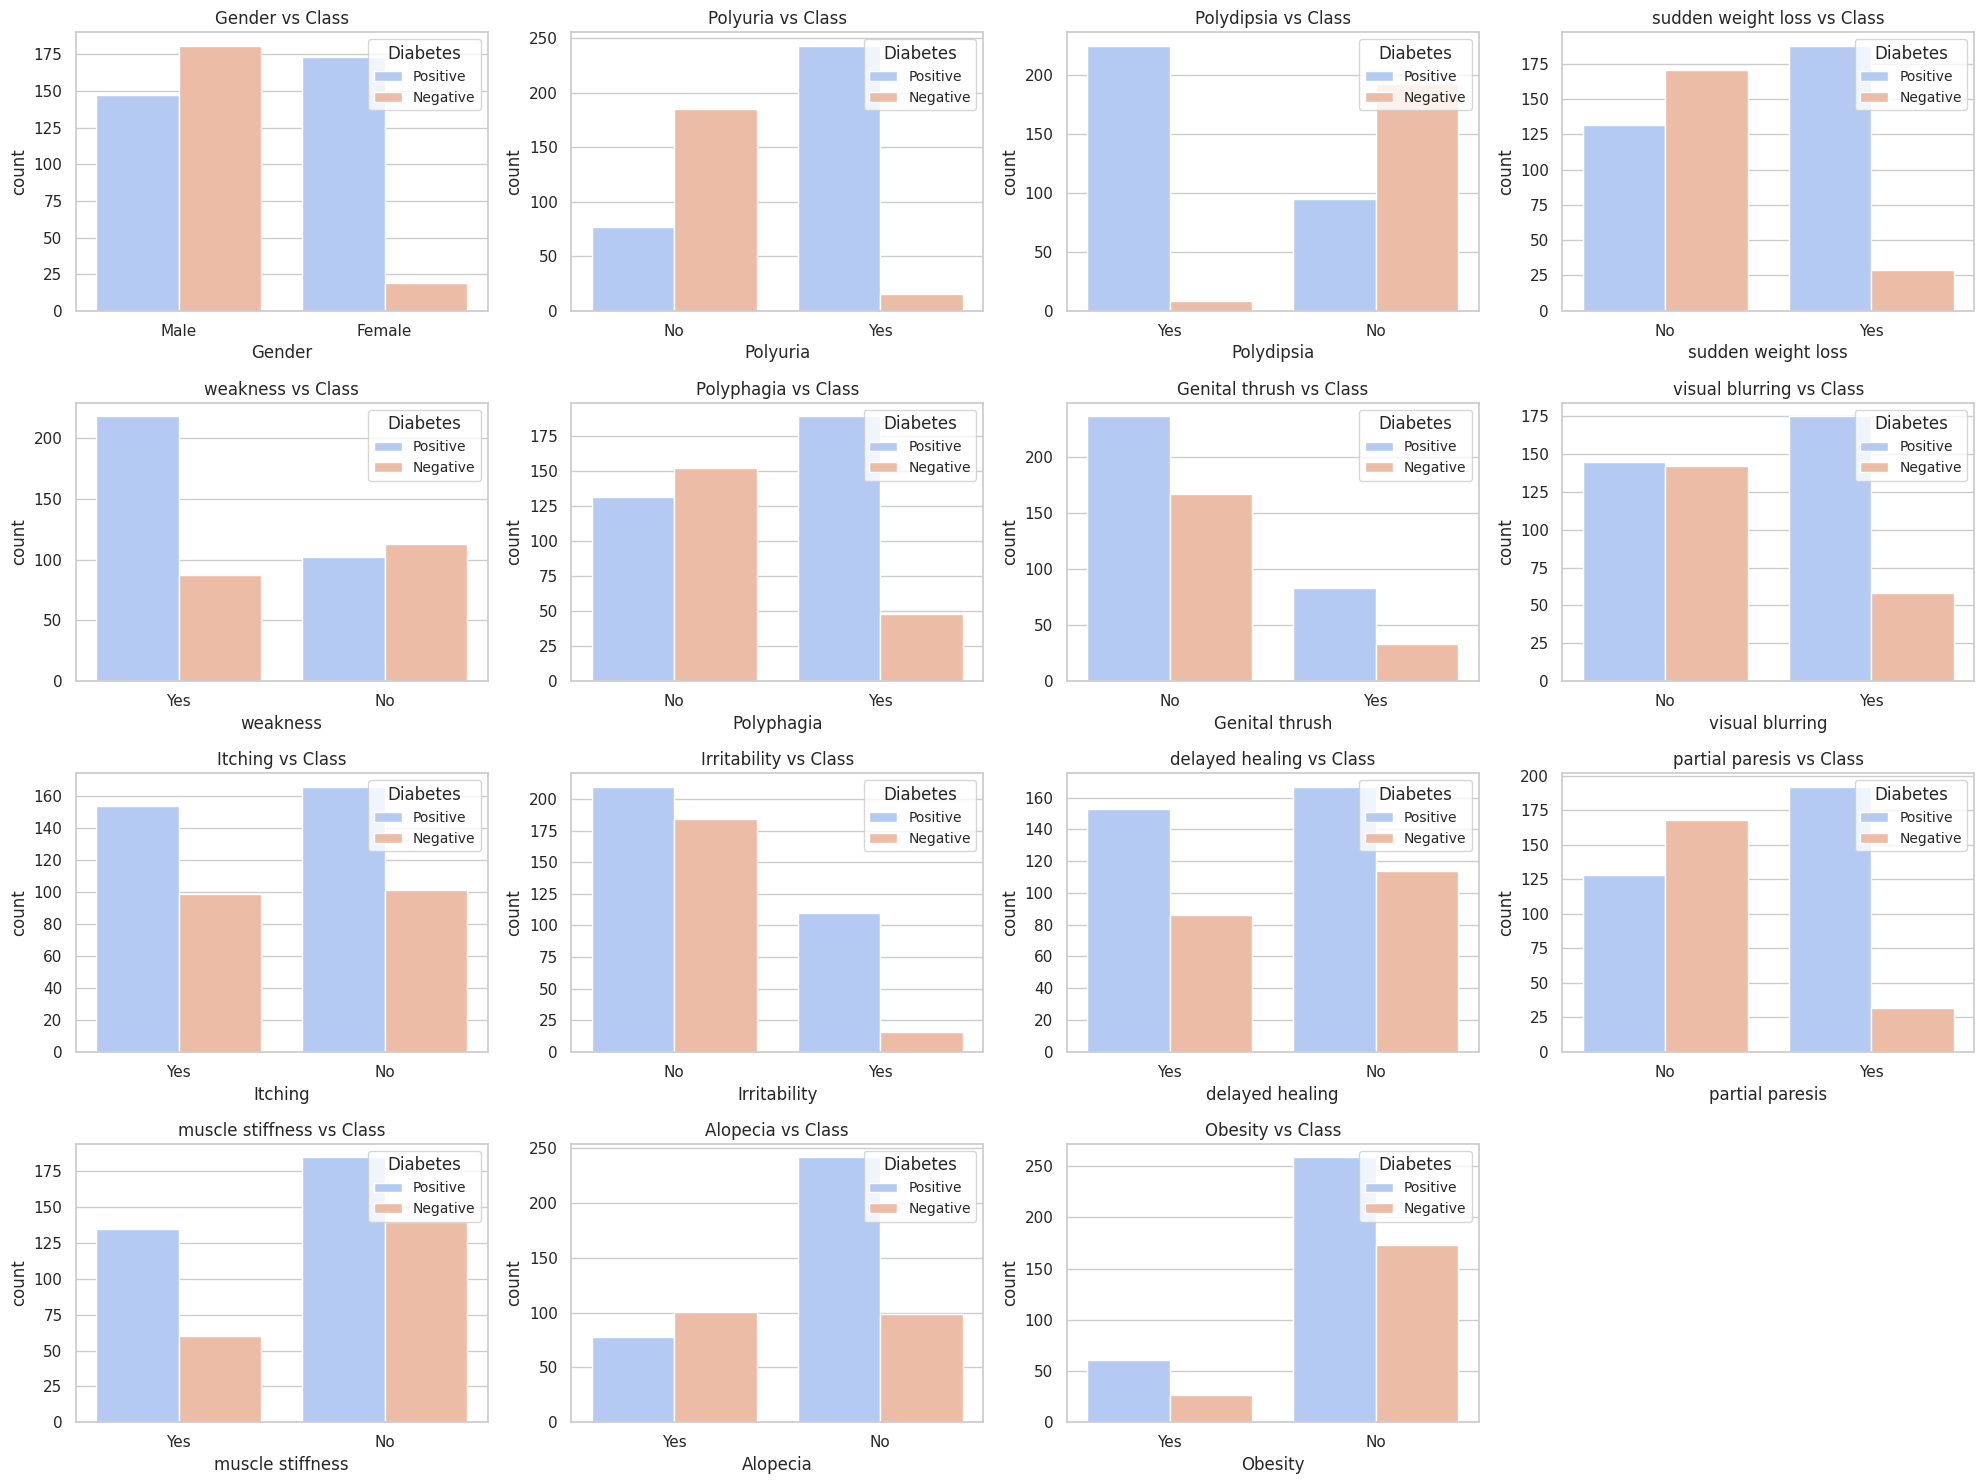

In [7]:
# List of categorical columns (excluding 'Age' and 'class')
cat_cols = [col for col in df.columns if col not in ['Age', 'class']]

# Setup the grid
plt.figure(figsize=(20, 15))

# Loop through every column and create a subplot
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='class', data=df, palette='coolwarm')
    plt.title(f'{col} vs Class')
    plt.legend(title='Diabetes', loc='upper right', labels=['Positive', 'Negative'], fontsize='small')

plt.tight_layout()
plt.show()

### Interpretation: Categorical Symptoms

* **Top Predictors:** `Polyuria` (Excessive Urination) and `Polydipsia` (Excessive Thirst) show the clearest separation. A patient with these symptoms has a very high probability of testing positive.

* **Critical Finding: Gender Bias:**
    The `Gender` plot reveals a significant imbalance: in this specific dataset, nearly all female patients are diabetic, while male patients are more balanced.
    * **The Risk:** If we include `Gender` as a feature, the model will learn a statistical shortcut: *"If Female, then Diabetic."*
    * **The Consequence:** This would lead to **False Positives**, where the model assigns a high risk (99%) to healthy women solely based on their gender, ignoring their actual symptoms.

* **Weak Features:** `Obesity`, `Itching`, and `Delayed Healing` show less distinct separation, suggesting they are weaker predictors on their own.

* **Decision:**
    * **Drop Gender:** To prevent demographic bias and ensure the model relies **only on clinical symptoms**, we will **remove the `Gender` column** from the training data.
    * **Feature Engineering:** We will encode all remaining symptoms to Binary (0/1).
    * **Keep Weak Features:** We will **NOT drop** features like Obesity yet. In machine learning, weak features can become strong predictors when combined with others (interaction effects).

## 6. Correlation Heatmap
To generate a Heatmap, we must first temporarily encode the text values into numbers (Yes=1, No=0).

/tmp/ipykernel_22399/1659564704.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace(mapping)


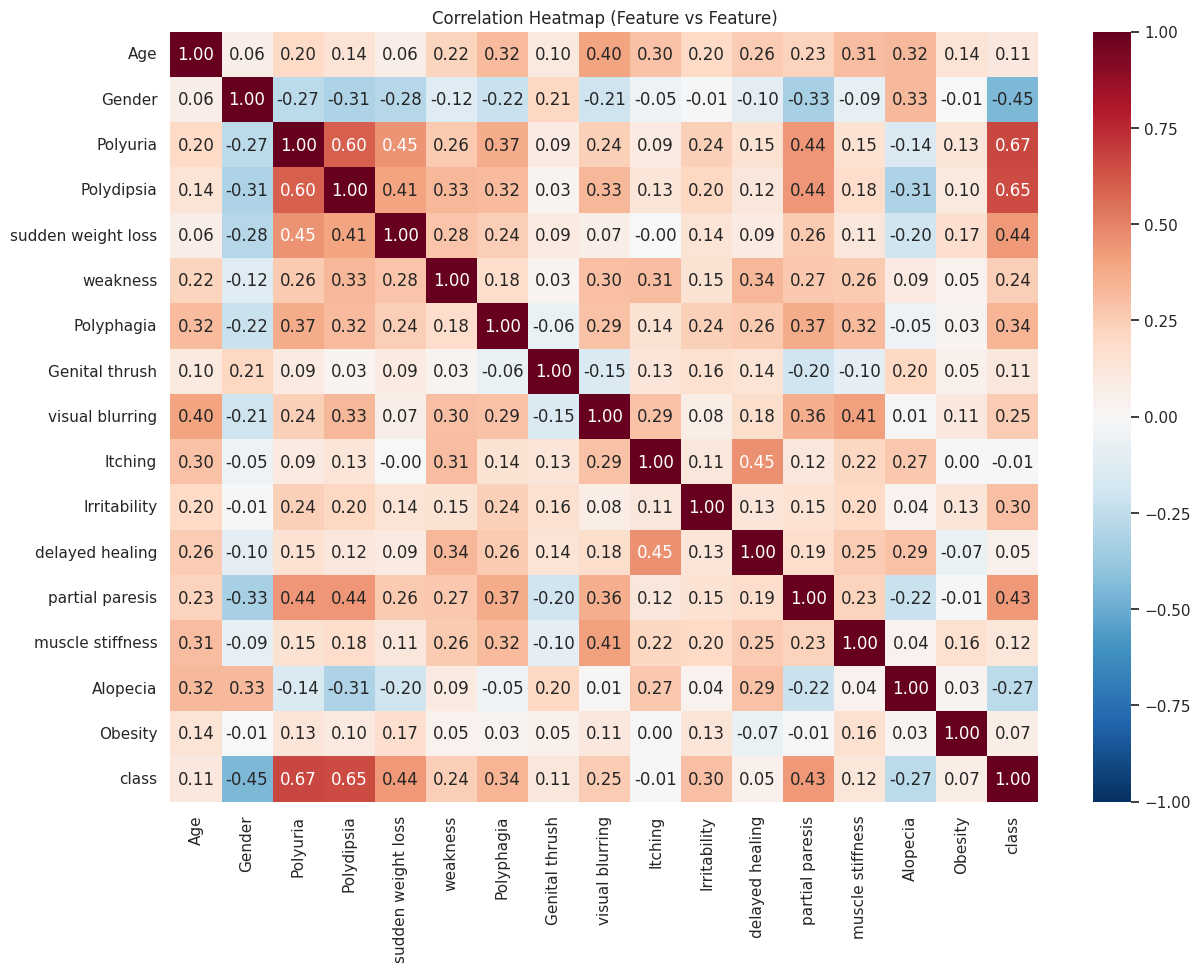

--- Correlation with Target (Class) ---
class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64


In [8]:
# 1. Create a copy and map text to numbers
df_encoded = df.copy()

# Mapping logic
mapping = {
    'Yes': 1, 'No': 0,
    'Positive': 1, 'Negative': 0,
    'Male': 1, 'Female': 0
}

# Apply mapping to all categorical columns
# (We apply it to the whole dataframe; Age will be ignored as it has no match)
df_encoded = df_encoded.replace(mapping)

# 2. Calculate Correlation
corr_matrix = df_encoded.corr()

# 3. Plot Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Feature vs Feature)')
plt.show()

# Show Correlation with Target specifically
print("--- Correlation with Target (Class) ---")
print(corr_matrix['class'].sort_values(ascending=False))

###  Heatmap Analysis:
* **Positive Correlation (Red):** Features closer to `1.0` with `class` move together. (e.g., If Polyuria is 1, Diabetes is likely 1).
* **Negative Correlation (Blue):** Features closer to `-1.0` move opposite.
* **Multicollinearity:** If two features (like Polyuria and Polydipsia) have a very high correlation with *each other* (e.g., > 0.8), they provide duplicate information.


## 7. Final Decisions for Data Preparation
Based on the comprehensive EDA, we have established the following strategy for our Data Preparation pipeline (`02_data_preparation.ipynb`):

### 1. Data Cleaning
* **Finding:** The dataset is exceptionally clean with **0 missing values** and correct data types.
* **Decision:** No imputation steps (filling `NaN`) are required. We can proceed directly to transformation.

### 2. Feature Scaling (Numerical)
* **Finding:** `Age` ranges from roughly 16 to 90, whereas all other features will be 0 or 1.
* **Decision:** We **must apply Scaling** (StandardScaler) to the `Age` column. This prevents the large age values from dominating distance-based algorithms (like KNN or SVM) during training.

### 3. Feature Encoding (Categorical)
* **Finding:** 15 out of 16 features are categorical strings (`"Yes"`, `"No"`, `"Male"`, `"Female"`).
* **Decision:** We will apply **Binary Encoding** (mapping Positive/Yes/Male → 1 and Negative/No/Female → 0).
    * *Note:* Since all categories are strictly binary, we do not need complex One-Hot Encoding with multiple columns per feature; simple binary mapping is sufficient and efficient.

### 4. Class Imbalance Strategy
* **Finding:** The target split is **61.5% Positive** vs **38.5% Negative**.
* **Decision:** This is a "mild" imbalance (roughly 60/40). It does not require aggressive resampling techniques like SMOTE. We will accept the distribution as-is, but we will monitor the **Recall** metric closely during evaluation.

### 5. Feature Selection
* **Finding:** `Polyuria` and `Polydipsia` are massive predictors (Correlation > 0.6). Features like `Obesity` and `Itching` are weak predictors.
* **Decision:** We will **retain ALL features** for the initial model training. We want to see if the "weak" features add value when combined with others (interaction effects) before deciding to drop them.

### 6. Bias Mitigation
* **Finding:** Our analysis revealed a critical bias in the `Gender` column. The data contains almost no examples of healthy women, leading the model to assign a near-100% risk score to females regardless of their symptoms.
* **Decision:** We will remove the `Gender` column entirely. This is an ethical and technical decision to prevent the model from learning `"Female = Diabetic"` as a shortcut. The model must rely solely on clinical symptoms.